In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv('corona_tested_006.csv')
df = df.drop(['Ind_ID','Test_date'],axis = 1)
df = df.dropna()
df.head()

C:\Users\pawan\AppData\Local\Temp\ipykernel_22408\3304632128.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('corona_tested_006.csv')


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,True,False,False,False,False,negative,No,male,Abroad
13728,True,False,False,False,False,negative,No,female,Abroad
13730,True,True,False,False,False,positive,Yes,female,Other
13731,False,False,False,False,False,other,No,female,Other
13732,False,False,False,False,False,other,No,female,Other


In [6]:
Data = df.copy()
Data.describe()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,138172,138172,138172,138172,138172,138172,138172,138172,138172
unique,2,2,2,2,2,3,2,2,3
top,False,False,False,False,False,negative,No,male,Other
freq,113009,125320,136676,137090,136073,125668,114092,70101,115951


In [15]:
Data['Cough_symptoms'] = Data['Cough_symptoms'].astype('bool').astype('int')
Data['Fever'] = Data['Fever'].astype('bool').astype('int')
Data['Sore_throat'] = Data['Sore_throat'].astype('bool').astype('int')
Data['Shortness_of_breath'] = Data['Shortness_of_breath'].astype('bool').astype('int')
Data['Headache'] = Data['Headache'].astype('bool').astype('int')
Data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1,0,0,0,0,negative,No,male,Abroad
13728,1,0,0,0,0,negative,No,female,Abroad
13730,1,1,0,0,0,positive,Yes,female,Other
13734,0,0,0,0,0,negative,No,male,Other
13735,0,0,0,0,0,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...
156035,1,0,1,0,0,negative,Yes,male,Abroad
156036,1,0,1,1,0,negative,No,male,Abroad
156037,1,1,0,0,0,negative,No,female,Abroad
156038,0,0,0,0,0,negative,No,male,Other


In [16]:
print(len(Data[Data['Corona'] == 'other']))
print(len(Data[Data['Corona'] == 'positive']))
print(len(Data[Data['Corona'] == 'negative']))

0
10626
125668


In [17]:
Data = Data[Data['Corona'] != 'other']
Data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1,0,0,0,0,negative,No,male,Abroad
13728,1,0,0,0,0,negative,No,female,Abroad
13730,1,1,0,0,0,positive,Yes,female,Other
13734,0,0,0,0,0,negative,No,male,Other
13735,0,0,0,0,0,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...
156035,1,0,1,0,0,negative,Yes,male,Abroad
156036,1,0,1,1,0,negative,No,male,Abroad
156037,1,1,0,0,0,negative,No,female,Abroad
156038,0,0,0,0,0,negative,No,male,Other


In [19]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
Data["Age_60_above"] = ord_enc.fit_transform(Data[["Age_60_above"]]).astype('int')
Data["Sex"] = ord_enc.fit_transform(Data[["Sex"]]).astype('int')
Data["Known_contact"] = ord_enc.fit_transform(Data[["Known_contact"]]).astype('int')
Data["Corona"] = ord_enc.fit_transform(Data[["Corona"]]).astype('int')
Data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1,0,0,0,0,0,0,1,0
13728,1,0,0,0,0,0,0,0,0
13730,1,1,0,0,0,1,1,0,2
13734,0,0,0,0,0,0,0,1,2
13735,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
156035,1,0,1,0,0,0,1,1,0
156036,1,0,1,1,0,0,0,1,0
156037,1,1,0,0,0,0,0,0,0
156038,0,0,0,0,0,0,0,1,2


In [20]:
print(len(Data[Data['Corona'] == 0]))
print(len(Data[Data['Corona'] == 1]))

125668
10626


In [22]:
df1 = Data[Data['Corona'] == 0].iloc[0:10626]
df2 = Data[Data['Corona'] == 1]
print(len(df1))
print(len(df2))
data = pd.concat([df1,df2])
data

10626
10626


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,1,0,0,0,0,0,0,1,0
13728,1,0,0,0,0,0,0,0,0
13734,0,0,0,0,0,0,0,1,2
13735,0,0,0,0,0,0,0,0,2
13736,0,0,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...
155836,0,0,0,0,0,1,0,1,2
156002,0,0,0,0,0,1,0,1,1
156005,0,0,0,0,0,1,0,1,1
156014,0,0,0,0,0,1,0,1,1


In [51]:
data = data.sample(frac = 1)
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
21681,0,0,0,0,0,0,0,0,2
94106,0,0,1,0,1,1,0,0,1
15847,0,0,0,0,0,0,0,0,2
42215,1,0,0,0,0,1,0,1,2
42658,0,1,0,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...
61827,1,1,0,0,1,1,0,0,2
35916,1,1,0,0,1,1,0,1,1
19926,1,1,0,0,0,0,1,0,0
23411,0,0,0,0,0,0,0,1,2


In [52]:
data.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Cough_symptoms,1.000000,0.400116,0.172939,0.167572,0.183600,0.302354,-0.004941,0.042728,-0.400468
Fever,0.400116,1.000000,0.152964,0.170466,0.233707,0.389041,0.067895,0.090105,-0.211166
Sore_throat,0.172939,0.152964,1.000000,0.156534,0.292422,0.256021,-0.028166,-0.025874,-0.083448
Shortness_of_breath,0.167572,0.170466,0.156534,1.000000,0.172170,0.213043,0.037000,0.007237,-0.062398
Headache,0.183600,0.233707,0.292422,0.172170,1.000000,0.318287,-0.040057,-0.005286,-0.103813
Corona,0.302354,0.389041,0.256021,0.213043,0.318287,1.000000,0.060173,0.096052,-0.299333
Age_60_above,-0.004941,0.067895,-0.028166,0.037000,-0.040057,0.060173,1.000000,0.000672,0.042194
Sex,0.042728,0.090105,-0.025874,0.007237,-0.005286,0.096052,0.000672,1.000000,-0.004837
Known_contact,-0.400468,-0.211166,-0.083448,-0.062398,-0.103813,-0.299333,0.042194,-0.004837,1.000000


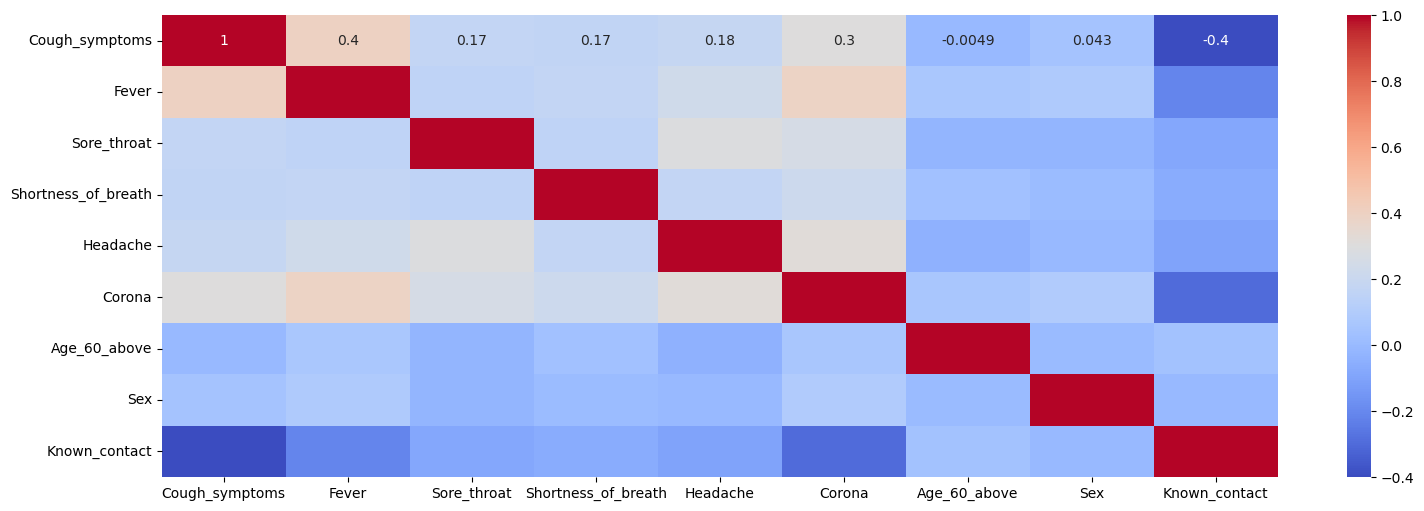

In [53]:
plt.figure(figsize = (18,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm" )
plt.show()

In [124]:
# training and normalization of data
X = data[['Cough_symptoms', 'Fever','Sore_throat', 'Shortness_of_breath', 'Headache','Age_60_above', 'Sex', 'Known_contact']]
Y = data['Corona']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=14)

In [ ]:
# def finding_test():
#     acc = []
#     for i in range(50):
#         X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=i)
#         from sklearn.linear_model import LogisticRegression
#         log_regression = LogisticRegression()
#         log_regression.fit(X_train,Y_train)
#         Y_pred = log_regression.predict(X_test)

#         lg_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
#         dic = {i:lg_accuracy} 
#         acc.append(dic)
    
#     return acc

# finding_test()


In [125]:
# using the logistic regression
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)
Y_pred = log_regression.predict(X_test)

lg_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
lg_accuracy

73.42

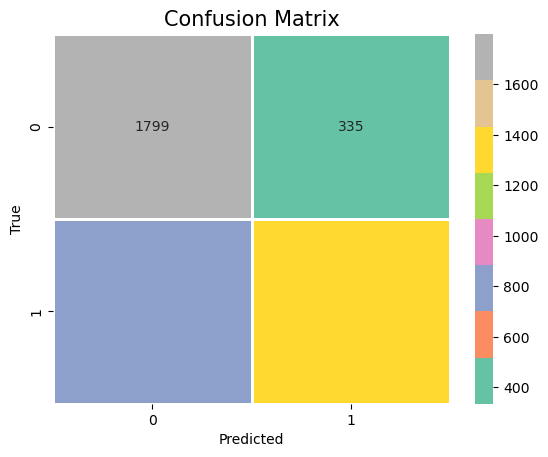

[[1799  335]
 [ 795 1322]]


In [126]:
cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print(cm)

In [127]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(Y_test)
print(classification_report(ytest,log_regression.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76      2134
           1       0.80      0.62      0.70      2117

    accuracy                           0.73      4251
   macro avg       0.75      0.73      0.73      4251
weighted avg       0.75      0.73      0.73      4251



In [133]:
#mean square error for logistic regression
from sklearn.metrics import mean_squared_error
mse_log_reg = mean_squared_error(Y_test, log_regression.predict(X_test))
print("MSE for Logistic Regression:", mse_log_reg)

MSE for Logistic Regression: 0.26581980710421077


In [128]:
#Using the SVC method 
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)

SVC()

In [129]:
#train aucc
svc_accuracy= round(accuracy_score(Y_test,svc.predict(X_test)), 4)*100 # Accuracy
svc_accuracy

87.16000000000001

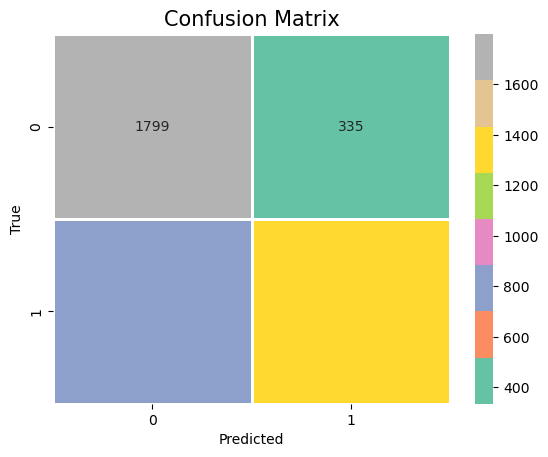

[[1968  166]
 [ 380 1737]]


In [130]:
cm01=confusion_matrix(Y_test,svc.predict(X_test))
class_label = [0, 1]
df_cm01 = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm01,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print(cm01)

In [132]:
ytest = np.array(Y_test)
print(classification_report(ytest,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2134
           1       0.91      0.82      0.86      2117

    accuracy                           0.87      4251
   macro avg       0.88      0.87      0.87      4251
weighted avg       0.88      0.87      0.87      4251



In [134]:
#mean square error for SVC model
mse_log_reg = mean_squared_error(Y_test, svc.predict(X_test))
print("MSE for SVC:", mse_log_reg)

MSE for SVC: 0.12844036697247707


In [138]:
#Models ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import roc_curve, auc

#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

In [139]:
#using the KNN for the prediction

test_accuracy = []
test_mse_value = []
train_accuracy = []
train_mse_value = []

for i in range(1,50):
  KNN= KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,Y_train)
  test_pred = KNN.predict(X_test)
  train_pred = KNN.predict(X_train)

  test_acc= round(accuracy_score(Y_test,test_pred), 5)*100 # Accuracy
  train_acc= round(accuracy_score(Y_train,train_pred), 5)*100 # Accuracy

  mse1 = round(mean_squared_error(Y_test,test_pred),3)
  mse2 = round(mean_squared_error(Y_train,train_pred),3)

  test_accuracy.append(test_acc)
  train_accuracy.append(train_acc)

  test_mse_value.append(mse1)
  train_mse_value.append(mse2)

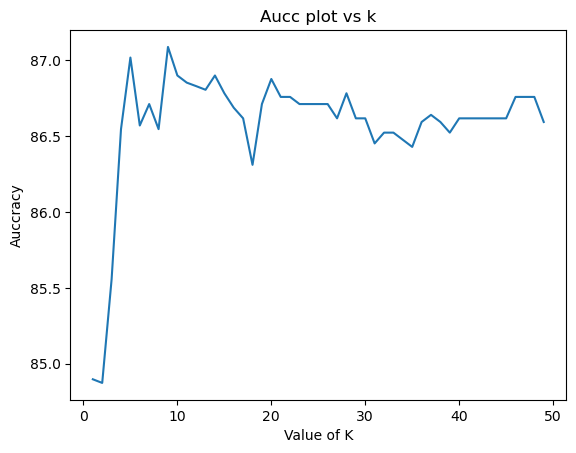

In [141]:
#accuracy wrt to the value of K
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = test_accuracy
plt.plot(x,y)
plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.show()

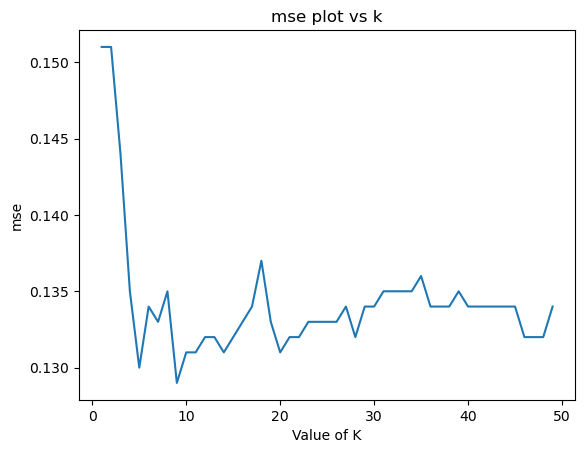

In [142]:
#mean suare error Vs the value of K
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y1 = test_mse_value
plt.plot(x,y1)
plt.title('mse plot vs k')
plt.xlabel('Value of K')
plt.ylabel('mse')
plt.show()

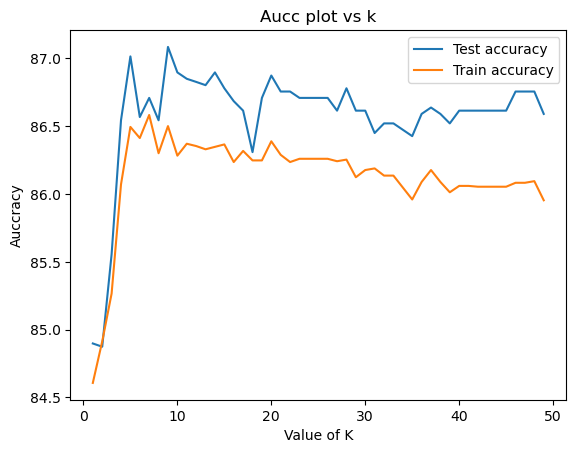

In [143]:
#accuracy curve for test VS train data 
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = test_accuracy
y1 = train_accuracy
plt.plot(x,y,label = 'Test accuracy')
plt.plot(x,y1,label = 'Train accuracy')

plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.legend()
plt.show()

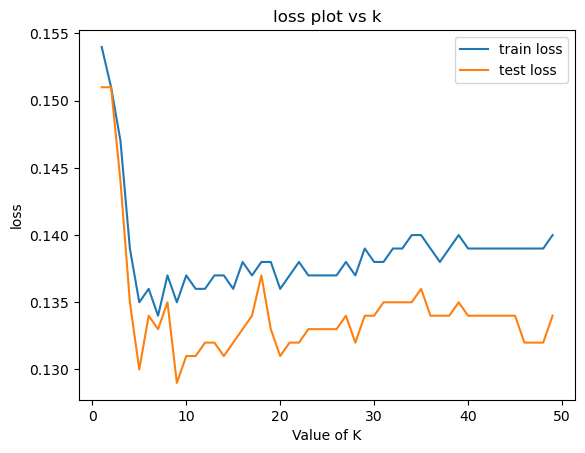

In [144]:
#loss on train vs test model 
import matplotlib.pyplot as plt
x = [i for i in range(1,50)]
y = train_mse_value
y1 = test_mse_value
plt.plot(x,y,label = 'train loss')
plt.plot(x,y1,label = 'test loss')

plt.title('loss plot vs k')
plt.xlabel('Value of K')
plt.ylabel('loss')
plt.legend()
plt.show()

In [151]:
#checking for the best Value for K to get the best results
max_accuracy = np.argmin(np.array(test_accuracy[7:12]) - np.array(train_accuracy[7:12])) +1
max_mse = np.argmin(np.array(train_mse_value[7:12]) - np.array(test_mse_value[7:12])) +1
print(max_accuracy)
print(max_mse)

1
1


In [152]:
#accuracy in KNN
KNN = KNeighborsClassifier(n_neighbors=8)
KNN.fit(X_train,Y_train)
Y_pred= KNN.predict(X_test)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy
print(KNN_accuracy)

86.544


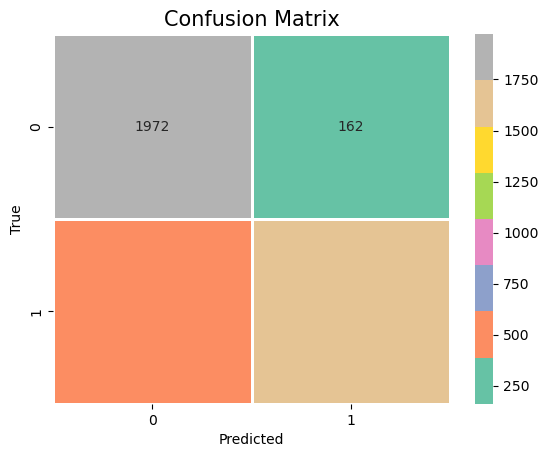

[[1972  162]
 [ 410 1707]]


In [153]:
cm02=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]
df_cm02 = pd.DataFrame(cm02, index=class_label,columns=class_label)
sns.heatmap(df_cm02,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
print(cm02)

In [154]:
#classification report 
ytest = np.array(Y_test)
print(classification_report(ytest,KNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2134
           1       0.91      0.81      0.86      2117

    accuracy                           0.87      4251
   macro avg       0.87      0.87      0.86      4251
weighted avg       0.87      0.87      0.86      4251



In [155]:
#mean square error for KNN 
from sklearn.metrics import mean_squared_error
mse_log_reg = mean_squared_error(Y_test, KNN.predict(X_test))
print("MSE for KNN:", mse_log_reg)

MSE for KNN: 0.1345565749235474
